## Problem1

Given is the diabetes dataset. Build an ensemble model to correctly classify the outcome variable and improve your model prediction by using GridSearchCV. You must apply Bagging, Boosting, Stacking, and Voting on the dataset.  

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('Diabeted_Ensemble.csv')
data.isnull().sum()

 Number of times pregnant        0
 Plasma glucose concentration    0
 Diastolic blood pressure        0
 Triceps skin fold thickness     0
 2-Hour serum insulin            0
 Body mass index                 0
 Diabetes pedigree function      0
 Age (years)                     0
 Class variable                  0
dtype: int64

In [6]:
data.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Number of times pregnant      768 non-null    int64  
 1    Plasma glucose concentration  768 non-null    int64  
 2    Diastolic blood pressure      768 non-null    int64  
 3    Triceps skin fold thickness   768 non-null    int64  
 4    2-Hour serum insulin          768 non-null    int64  
 5    Body mass index               768 non-null    float64
 6    Diabetes pedigree function    768 non-null    float64
 7    Age (years)                   768 non-null    int64  
 8    Class variable                768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [8]:
data.shape

(768, 9)

In [9]:
data.columns

Index([' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)', ' Class variable'],
      dtype='object')

In [10]:
# Label encode Class variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data[' Class variable'] = encoder.fit_transform(data[' Class variable'])

In [11]:
data.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
# no zero variance
data.var()

 Number of times pregnant           11.354056
 Plasma glucose concentration     1022.248314
 Diastolic blood pressure          374.647271
 Triceps skin fold thickness       254.473245
 2-Hour serum insulin            13281.180078
 Body mass index                    62.159984
 Diabetes pedigree function          0.109779
 Age (years)                       138.303046
 Class variable                      0.227483
dtype: float64

In [13]:
colnames = list(data.columns)
predictors = colnames[:8]
target = colnames[8]

In [14]:
predictors

[' Number of times pregnant',
 ' Plasma glucose concentration',
 ' Diastolic blood pressure',
 ' Triceps skin fold thickness',
 ' 2-Hour serum insulin',
 ' Body mass index',
 ' Diabetes pedigree function',
 ' Age (years)']

In [15]:
target

' Class variable'

In [16]:
X = np.array(data.iloc[:,:8]) # Predictors 
Y = np.array(data.iloc[:,8]) # Target

In [17]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
#train, test = train_test_split(data, test_size = 0.3)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [18]:
X_train.shape

(614, 8)

In [19]:
Y_train.shape

(614,)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model, svm
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.model_selection import cross_val_score

In [21]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()
#clf4 = linear_model.Perceptron(tol=1e-2, random_state=0)
clf5 = svm.SVC(gamma=0.001,probability=True)
#clf6 = MB()

In [22]:
estimators = [('Logistic Regression',clf1),('Random Forest',clf2),('KNeighbors',clf3),('svm',clf5)]

### Cross Validate individual models

In [23]:
#cross validate 5 iterations and take mean of accuracy of each model
for estimator in estimators:
    x = cross_val_score(estimator[1],X_train,Y_train,cv=5,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Logistic Regression 0.76
Random Forest 0.76
KNeighbors 0.72
svm 0.73


### Hard Voting (0.75)

In [24]:
from sklearn.ensemble import VotingClassifier

In [25]:
# Hard Voting
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X_train,Y_train,cv=5,scoring='accuracy')
print(np.round(np.mean(x),2))

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

0.75


### Soft Voting (0.76)

In [26]:
#Soft Voting
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X_train,Y_train,cv=5,scoring='accuracy')
print(np.round(np.mean(x),2))

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

0.76


#### Using GridSearchCV (0.76)

In [27]:
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingClassifier
from sklearn.naive_bayes import GaussianNB 

# Initializing models
clf6 = LogisticRegression()
clf7 = RandomForestClassifier()
clf8 = KNeighborsClassifier()
clf9 = svm.SVC(gamma=0.001,probability=True)

estimators = [('LogisticRegression',clf6),('RandomForest',clf7),('KNeighbors',clf8),('svm',clf9)]

vclf = VotingClassifier(estimators=estimators,voting='soft')

#params = {#'kneighborsclassifier__n_neighbors': [1, 5],
          #'randomforestclassifier__n_estimators': [10, 50]}

    
params = {'KNeighbors__n_neighbors': [1, 5],'RandomForest__n_estimators': [10, 50]}

grid = GridSearchCV(estimator=vclf, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(X_train, Y_train)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)


c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

0.756 +/- 0.02 {'KNeighbors__n_neighbors': 1, 'RandomForest__n_estimators': 10}
0.748 +/- 0.02 {'KNeighbors__n_neighbors': 1, 'RandomForest__n_estimators': 50}
0.753 +/- 0.02 {'KNeighbors__n_neighbors': 5, 'RandomForest__n_estimators': 10}
0.759 +/- 0.03 {'KNeighbors__n_neighbors': 5, 'RandomForest__n_estimators': 50}
Best parameters: {'KNeighbors__n_neighbors': 5, 'RandomForest__n_estimators': 50}
Accuracy: 0.76


c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Stacking (0.79)

In [28]:
# Create the ensemble's base learners and meta learner
# Append base learners to a list
base_learners = []

In [29]:
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()
clf5 = svm.SVC(gamma=0.001,probability=True)

base_learners.append(clf2)
base_learners.append(clf3)
base_learners.append(clf5)

In [30]:
base_learners

[RandomForestClassifier(),
 KNeighborsClassifier(),
 SVC(gamma=0.001, probability=True)]

In [31]:
# Meta model using Logistic Regression
meta_learner = LogisticRegression(solver='lbfgs')
meta_learner

LogisticRegression()

In [32]:
# Create variables to store meta data and the targets
meta_data = np.zeros((len(base_learners), len(X_train)))
meta_targets = np.zeros(len(X_train))

In [33]:
from sklearn.model_selection import KFold
# Create the cross-validation folds
KF = KFold(n_splits = 5)
meta_index = 0
for train_indices, test_indices in KF.split(X_train):
    # Train each learner on the K-1 folds and create meta data for the Kth fold
    for i in range(len(base_learners)):
        learner = base_learners[i]

        learner.fit(X_train[train_indices], Y_train[train_indices])
        predictions = learner.predict_proba(X_train[test_indices])[:,0]

        meta_data[i][meta_index:meta_index+len(test_indices)] = predictions

    meta_targets[meta_index:meta_index+len(test_indices)] = Y_train[test_indices]
    meta_index += len(test_indices)


In [34]:
# Transpose the meta data to be fed into the meta learner
meta_data = meta_data.transpose()


In [35]:
# Create the meta data for the test set and evaluate the base learners
from sklearn import metrics
test_meta_data = np.zeros((len(base_learners), len(X_test)))
base_acc = []

for i in range(len(base_learners)):
    learner = base_learners[i]
    learner.fit(X_train, Y_train)
    predictions = learner.predict_proba(X_test)[:,0]
    test_meta_data[i] = predictions

    acc = metrics.accuracy_score(Y_test, learner.predict(X_test))
    base_acc.append(acc)
    
test_meta_data = test_meta_data.transpose()

In [36]:
# Fit the meta learner on the train set and evaluate it on the test set
meta_learner.fit(meta_data, meta_targets)
ensemble_predictions = meta_learner.predict(test_meta_data)

acc = metrics.accuracy_score(Y_test, ensemble_predictions)

In [37]:
# Print the results
for i in range(len(base_learners)):
    learner = base_learners[i]

    print(f'{base_acc[i]:.2f} {learner.__class__.__name__}')
    
print(f'{acc:.2f} Ensemble')

0.79 RandomForestClassifier
0.75 KNeighborsClassifier
0.77 SVC
0.79 Ensemble


#### Using GridSearchCV (0.76)

In [38]:
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingClassifier
from sklearn.naive_bayes import GaussianNB 

# Initializing models
clf1 = KNeighborsClassifier()
clf2 = RandomForestClassifier()
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

params = {'kneighborsclassifier__n_neighbors': [1, 5],
          'randomforestclassifier__n_estimators': [10, 50],
          'meta_classifier__C': [0.1, 10.0]}

grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(X_train, Y_train)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)


0.736 +/- 0.03 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.757 +/- 0.02 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 50}
0.691 +/- 0.01 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.757 +/- 0.03 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 50}
0.741 +/- 0.02 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.753 +/- 0.02 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 50}
0.730 +/- 0.02 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.748 +/- 0.02 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 10.0, 'randomforestclassifier_

### Bagging (0.77)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
#from mlextend.plotting import plot_decision_regions

clftree = DecisionTreeClassifier()

In [40]:
import matplotlib.pyplot as plt
def draw_tree(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [41]:
#draw_tree(clftree,X_train,Y_train)

In [42]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(base_estimator = clftree, n_estimators = 500,
                            bootstrap = True, n_jobs = 1, random_state = 42)

bag_clf.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=1, random_state=42)

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluation on Training Data
confusion_matrix(Y_train, bag_clf.predict(X_train))

array([[394,   0],
       [  0, 220]], dtype=int64)

In [44]:
accuracy_score(Y_train, bag_clf.predict(X_train))

1.0

In [45]:
# Evaluation on Testing Data
confusion_matrix(Y_test, bag_clf.predict(X_test))

array([[87, 19],
       [16, 32]], dtype=int64)

In [46]:
accuracy_score(Y_test, bag_clf.predict(X_test))

0.7727272727272727

#### Using GridSearchCV (0.768)

In [47]:
parameters = {
    'n_estimators': [50,100,500], 
    'max_samples': [0.1,0.4,0.7,1.0],
    'bootstrap' : [True,False],
    'max_features' : [0.1,0.4,0.7,1.0]
    }

In [48]:
search = GridSearchCV(BaggingClassifier(), parameters, cv=5)

In [49]:
search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [0.1, 0.4, 0.7, 1.0],
                         'max_samples': [0.1, 0.4, 0.7, 1.0],
                         'n_estimators': [50, 100, 500]})

In [50]:
#GridSearchCV(cv=5, error_score=nan,
#             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
#                                         bootstrap_features=False,
#                                         max_features=1.0, max_samples=1.0,
#                                         n_estimators=10, n_jobs=None,
#                                         oob_score=False, random_state=None,
#                                         verbose=0, warm_start=False),
#             iid='deprecated', n_jobs=None,
#             param_grid={'bootstrap': [True, False],
#                         'max_features': [0.1, 0.4, 0.7, 1.0],
#                         'max_samples': [0.1, 0.4, 0.7, 1.0],
#                         'n_estimators': [50, 100, 500]},
#             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
#             scoring=None, verbose=0)

In [51]:
search.best_params_


{'bootstrap': False,
 'max_features': 0.7,
 'max_samples': 0.1,
 'n_estimators': 500}

In [52]:
search.best_score_

0.7688258030121283

### Boosting (0.75)

#### AdaBoost (0.75)

In [54]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(learning_rate = 0.02, n_estimators = 5000)
ada_clf.fit(X_train, Y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Evaluation on Training Data
confusion_matrix(Y_train, ada_clf.predict(X_train))

array([[352,  42],
       [ 63, 157]], dtype=int64)

In [56]:
accuracy_score(Y_train, ada_clf.predict(X_train))

0.8289902280130294

In [57]:
# Evaluation on Testing Data
confusion_matrix(Y_test, ada_clf.predict(X_test))

array([[87, 19],
       [19, 29]], dtype=int64)

In [58]:
accuracy_score(Y_test, ada_clf.predict(X_test))

0.7532467532467533

#### Gradient Boosting (0.75)

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

boost_clf = GradientBoostingClassifier()

boost_clf.fit(X_train, Y_train)

GradientBoostingClassifier()

In [60]:
confusion_matrix(Y_test, boost_clf.predict(X_test))

array([[87, 19],
       [19, 29]], dtype=int64)

In [61]:
accuracy_score(Y_test, boost_clf.predict(X_test))

0.7532467532467533

#### XGBoost (0.73)

In [64]:
#pip install xgboost
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(max_depths = 5, n_estimators = 10000, learning_rate = 0.3, n_jobs = -1)
xgb_clf.fit(X_train, Y_train)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:09:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_depths" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:09:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, max_depths=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10000, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
# Evaluation on Testing Data
confusion_matrix(Y_test, xgb_clf.predict(X_test))

array([[84, 22],
       [20, 28]], dtype=int64)

In [66]:
accuracy_score(Y_test, xgb_clf.predict(X_test))

0.7272727272727273

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

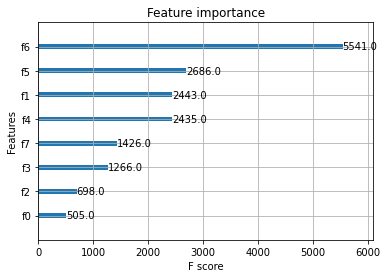

In [67]:
xgb.plot_importance(xgb_clf)

In [68]:
xgb_clf = xgb.XGBClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 42)
xgb_clf.fit(X_train, Y_train)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:09:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
# Evaluation on Testing Data
confusion_matrix(Y_test, xgb_clf.predict(X_test))

array([[84, 22],
       [19, 29]], dtype=int64)

In [70]:
accuracy_score(Y_test, xgb_clf.predict(X_test))

0.7337662337662337

#### Using GridSearchCV (0.75)

In [81]:
param_test1 = {'max_depth': range(3,10,2), 'gamma': [0,0.3],
               'subsample': [0.8, 0.9], 'colsample_bytree': [0.8,1],
               'rag_alpha': [0, 0.1]}

In [82]:
grid_search = GridSearchCV(xgb_clf, param_test1, n_jobs = -1, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, Y_train)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:31:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "rag_alpha" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:31:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=6, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=500, n_jobs=4,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact

In [83]:
cv_xg_clf = grid_search.best_estimator_

In [84]:
cv_xg_clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.3, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=4,
              num_parallel_tree=1, predictor='auto', rag_alpha=0,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [85]:
# Evaluation on Testing Data with model with hyperparameter
accuracy_score(Y_test, cv_xg_clf.predict(X_test))

0.7532467532467533

In [86]:
grid_search.best_params_

{'colsample_bytree': 1,
 'gamma': 0.3,
 'max_depth': 3,
 'rag_alpha': 0,
 'subsample': 0.9}

## Analysis and Conclusion

by decreasing level of accuracy  
1) Stacking: 0.79  
2) Bagging: 0.77  
3) Soft Voting: 0.76  
4) Hard Voting: 0.75  
5) Boosting: 0.75  
  
Stacking classifier can be chosen in this case   